### 1. Preparação dos dados

In [1]:
!unzip -q dataset.zip

### 2. Treinamento

In [2]:
# Célula 1: Instalação e Importação
!pip install ultralytics -q
from ultralytics import YOLO
print("Ambiente YOLO pronto!")

# Célula 2: Carregar Modelo Pré-treinado
model = YOLO('yolov8n.pt')
print("Modelo YOLOv8n pré-treinado carregado.")

# Célula 3: Iniciar o Treinamento
print("--- Iniciando o Treinamento do YOLOv8 ---")
model.train(
    data='road_signs_dataset.yaml',
    epochs=25,
    imgsz=640,
    device=0
)
print("\n--- Treinamento Concluído! ---")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ambiente YOLO pronto!
Modelo YOLOv8n pré-treinado carregado.
--- Iniciando o Treinamento do YOLOv8 ---
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=road_signs_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, e

### 3. Teste do modelo

Modelo treinado carregado de: runs/detect/train/weights/best.pt

image 1/1 /content/dataset/val/images/road742.png: 640x480 2 speedlimits, 41.4ms
Speed: 2.5ms preprocess, 41.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

Resultado da Deteção:


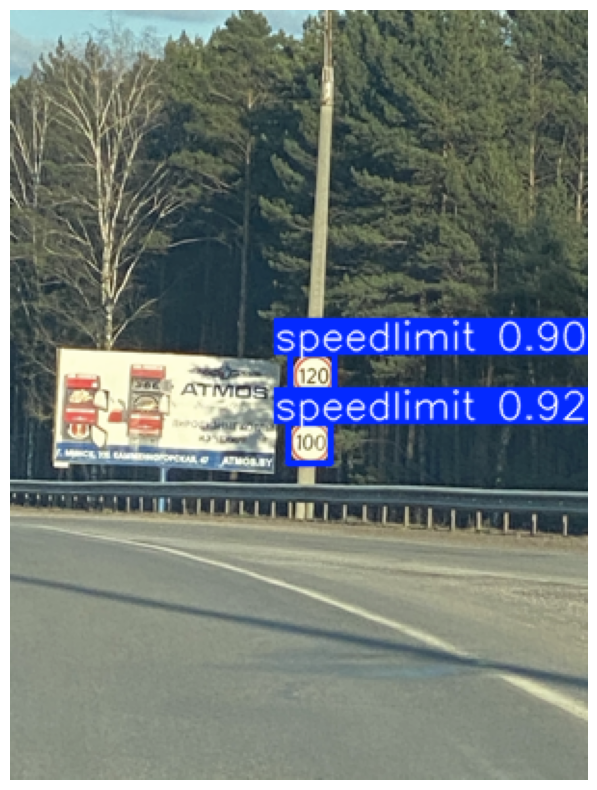

In [4]:
# Importa a biblioteca YOLO e o OpenCV para visualização
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# --- Carregar o Seu Modelo Treinado ---
# O caminho para o seu melhor modelo geralmente está aqui.
# Se a pasta de treino não for a primeira (ex: train2, train3), ajuste o caminho.
model_path = 'runs/detect/train/weights/best.pt'
model = YOLO(model_path)

print(f"Modelo treinado carregado de: {model_path}")


# --- Fazer uma Previsão numa Imagem de Teste ---
# Vamos pegar numa imagem aleatória da nossa pasta de validação para o teste.
image_to_test = 'dataset/val/images/road742.png' # Pode mudar para qualquer imagem

# A função model() faz a deteção.
results = model(image_to_test)

# --- Visualizar o Resultado ---
# A biblioteca ultralytics já desenha as caixas na imagem para nós.
# Acedemos à primeira imagem com os resultados desenhados.
result_plot = results[0].plot()

# O OpenCV lê em BGR, então convertemos para RGB para uma exibição correta no Matplotlib.
result_plot_rgb = cv2.cvtColor(result_plot, cv2.COLOR_BGR2RGB)

print("\nResultado da Deteção:")
plt.figure(figsize=(10, 10))
plt.imshow(result_plot_rgb)
plt.axis('off') # Esconde os eixos
plt.show()

In [5]:
# O comando 'zip -r' cria um ficheiro .zip de forma recursiva.
# 'yolo_training_results.zip' é o nome do nosso ficheiro de saída.
# 'runs/' é a pasta que queremos compactar.

print("Compactando a pasta 'runs' num ficheiro .zip...")
!zip -r yolo_training_results.zip runs/

print("\n--- Processo Concluído! ---")
print("O ficheiro 'yolo_training_results.zip' foi criado com sucesso.")

Compactando a pasta 'runs' num ficheiro .zip...
  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/labels.jpg (deflated 34%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 16%)
  adding: runs/detect/train/val_batch2_labels.jpg (deflated 9%)
  adding: runs/detect/train/train_batch0.jpg (deflated 3%)
  adding: runs/detect/train/BoxP_curve.png (deflated 13%)
  adding: runs/detect/train/confusion_matrix.png (deflated 29%)
  adding: runs/detect/train/train_batch1.jpg (deflated 5%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train/BoxR_curve.png (deflated 10%)
  adding: runs/detect/train/val_batch1_labels.jpg (deflated 6%)
  adding: runs/detect/train/BoxPR_curve.png (deflated 16%)
  adding: runs/detect/train/val_batch2_pred.jpg (deflated 9%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 26%)
  adding: runs/detect/train/results.png (deflated 8%)
